In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Flatten, Input, Concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

출력이 두 개인 클래스


In [2]:
input_ = Input(shape=(10,10), name="Input")
hidden1 = Dense(100, activation="relu")(input_)
hidden2 = Dense(10, activation="relu")(hidden1)
output = Dense(1, activation="sigmoid", name="main_output")(hidden2)
sub_out = Dense(1, name="sum_output")(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

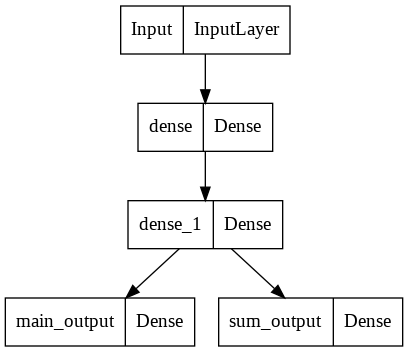

In [4]:
plot_model(model)

입력이 두개이고 출력이 두개인 클래스

In [7]:
input_1 = Input(shape=(10, 10), name="input_1")
input_2 = Input(shape=(10, 28), name="input_2")
hidden1 = Dense(100, activation="relu")(input_2)
hidden2 = Dense(10, activation="relu")(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation="sigmoid", name="main_output")(concat)
sub_out = Dense(1, name="sum_output")(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 10, 10)       1010        ['dense_6[0][0]']                
                                                                                            

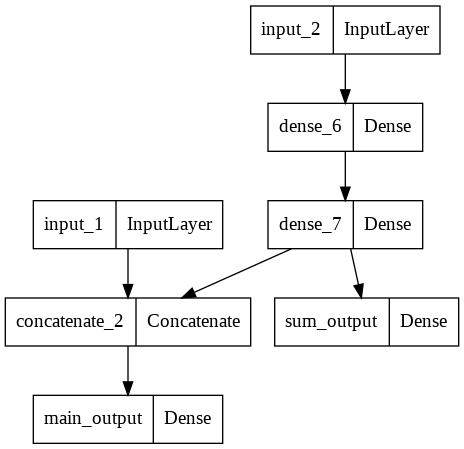

In [9]:
plot_model(model)

서브클래싱(Subclassing)


*   커스터마이징에 최적화된 방법
*   Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음
      * fit(), evaluate(), predict()
      * save(), load()
* 주로 call() 메소드 안에서 원하는 계산 가능
      * for, if, 저수준 연산 등
* 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때, 해석할 수 있어야 함



In [10]:
class MyModel(Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = Dense(300, activation=activation)
    self.dense_layer2 = Dense(100, activation=activation)
    self.dense_layer3 = Dense(units, activation=activation)
    self.output_layer = Dense(10, activation="softmax")
  
  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x
        

모델 가중치 확인

In [11]:
inputs = Input(shape=(28,28,1))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation="relu")(x)
x = Dense(100, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


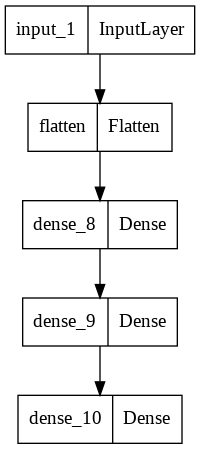

In [12]:
plot_model(model)

In [13]:
model.layers

In [14]:
hidden_2 = model.layers[2]
hidden_2.name

'dense_8'

In [15]:
model.get_layer("dense_8") is hidden_2

True

In [16]:
weights, biases = hidden_2.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [17]:
print(weights)

[[-0.01406605 -0.06977618 -0.00051631 ...  0.07298283  0.00572145
   0.03737246]
 [ 0.06260893 -0.05389071 -0.00250554 ... -0.00180621 -0.03306412
  -0.00055072]
 [ 0.05939279  0.02076512  0.06317221 ...  0.0289008   0.07376838
   0.05995359]
 ...
 [ 0.0296048   0.01587515  0.05986421 ... -0.04402981 -0.02937419
  -0.06731565]
 [ 0.0122934   0.02395312 -0.06243485 ...  0.0527982  -0.07322107
   0.00294202]
 [ 0.01122448 -0.04046427  0.01989879 ...  0.00017586  0.0292922
  -0.03219864]]


In [18]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


모델 컴파일(compile)
 * 모델을 구성한 후 사용할 손실함수(loss function), 옵티마이저(optimizer)를 지정

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**손실 함수(Loss Function)**

* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공지표
* 손실함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* Keras에서 주요 손실 함수 제공
    * sparse_categorical_crossentropy: 클래스가 베타적 방식으로 구분, 즉 (0, 1, 2, ..., 9) 와 같은 방식으로 구분되어 있을 때 사용
    * categorical_cross_entropy: 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용
    * binary_crossentropy: 이진 분류를 수행할 때 사용

평균 절대 오차(Mean Absolute Error, MAE)
* 오차가 커져도 손실함수가 일정하게 증가
* 이상치(Outlier)에 강건함(Robust)
    * 데이터에서 [입력-정답] 관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 발생하는 경우가 발생
    * 해당 이상치에 해당하는 지점에서 손실함수의 최소값으로 가는 정도의 영향력이 크지 않음
* 회귀(Regression)에 많이 사용
* 평균 절대 오차 공식

<img src="https://velog.velcdn.com/images%2Fyuns_u%2Fpost%2F69ab4373-c541-4932-acea-fa72bcc7d294%2Fimage.png">

    * x_i : 학습 데이터의 i번째 정답
    * ^(x_i): 학습 데이터의 입력으로 추정한 i번째 출력

평균제곱오차(MSE, Mean Squared Error)

* 가장 많이 쓰이는 손실 함수 중 하나


라벨 인코딩을 이진 분류 원핫인코딩으로 바꾸는 방법
- 정답인 레이블을 1로, 나머지 레이블을 0으로 대치하는 것
- 더미 변수라고도 함

교차 엔트로피 오차(Cross Entropy Error, CEE)

* 이진 분류(Binary Classification), 다중 클래스 분류(Multi Class Classification)
* 소프트맥스(softmax)와 원-핫 인코딩(one-hot encoding) 사이의 출력 간 거리를 비교
* 정답인 클래스에 대해서만 오차를 계산
* 정답을 맞추면 오차가 0, 틀리면 그 차이가 클 수록 오차가 무한히 커짐
* y = log(x)
    * x가 1에 가까울수록 0에 가까워짐
    * x가 0에 가까울수록 y값은 무한히 커짐



교차 엔트로피 오차 식

<img src="https://blog.kakaocdn.net/dn/cPYExj/btqLTxk2AEk/jkF2MUUthy2Mja8hFsKwB0/img.png">

정답 레이블(y_i)은 원-핫 인코딩으로 정답인 인덱스에만 1이고, 나머지는 모두 0이라서 다음과 같이 나타낼 수 있음

- 소프트맥스를 통해 나온 신경망 출력이 0.6이라면, -log0.6(약 -0.51)이 되고, 신경망 출력이 0.3이라면, -log0.3(약 -1.2)가 됨
- 정답에 가까워질수록 오차값은 작아짐
- 학습 시 원핫인코딩에 의해 정답 인덱스만 살아남아 비교하지만, 정답이 아닌 인덱스들도 학습에 영향을 미침. 왜냐하면 다중 클래스 분류는 소프트맥스(softmax) 함수를 통해 전체 항들을 모두 다루기 때문.
